# **importing dataseta**

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SEMESTER 1/data science/ASSIGNMENT/cyber attack prediction/updated_cybersecurity_attacks.csv')

# Inspect the data
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40000 non-null  int64  
 1   Timestamp               40000 non-null  object 
 2   Source IP Address       40000 non-null  object 
 3   Destination IP Address  40000 non-null  object 
 4   Source Port             40000 non-null  int64  
 5   Destination Port        40000 non-null  int64  
 6   Protocol                40000 non-null  object 
 7   Packet Length           40000 non-null  int64  
 8   Packet Type             40000 non-null  object 
 9   Traffic Type            40000 non-null  object 
 10  Payload Data            40000 non-null  object 
 11  Malware Indicators      40000 non-null  object 
 12  Anomaly Scores          40000 non-null  float64
 13  Alerts/Warnings         40000 non-null  object 
 14  Attack Type             40000 non-null

,Unnamed: 0,Source Port,Destination Port,Packet Length,Anomaly Scores,Year,Month,Day,Hour,Minute,Second,DayOfWeek
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,32970.356450,33150.868650,781.452725,50.113473,2021.411375,6.288275,15.629550,11.507350,29.511825,29.591300,2.995750
std,11547.14972,18560.425604,18574.668842,416.044192,28.853598,1.085253,3.332979,8.771715,6.919122,17.360543,17.357387,2.004515
min,0.00000,1027.000000,1024.000000,64.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,16850.750000,17094.750000,420.000000,25.150000,2020.000000,3.000000,8.000000,5.000000,14.000000,14.000000,1.000000
50%,19999.50000,32856.000000,33004.500000,782.000000,50.345000,2021.000000,6.000000,16.000000,12.000000,29.000000,30.000000,3.000000
75%,29999.25000,48928.250000,49287.000000,1143.000000,75.030000,2022.000000,9.000000,23.000000,17.000000,45.000000,45.000000,5.000000
max,39999.00000,65530.000000,65535.000000,1500.000000,100.000000,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000


### **check attack type**

In [6]:
# Check the unique values in the 'Attack Type' column
unique_attack_types = df['Attack Type'].unique()
print(unique_attack_types)


['Malware' 'DDoS' 'Intrusion']


# **preprocessing**

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
#file_path = '/path_to_your_file/updated_cybersecurity_attacks.csv'
#df = pd.read_csv(file_path)

# Drop unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0', 'Timestamp'])

# Check for missing values and drop rows with missing 'Attack Type'
df_cleaned = df_cleaned.dropna(subset=['Attack Type'])

# Check if 'Attack Type' has all three categories
print(df_cleaned['Attack Type'].unique())

# Encode categorical columns using LabelEncoder
label_cols = ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type',
              'Log Source', 'Browser', 'Device/OS', 'Attack Type']  # Include 'Attack Type'
label_encoders = {col: LabelEncoder() for col in label_cols}

for col in label_cols:
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

# Normalize numerical columns
#scaler = StandardScaler()
#df_cleaned['Packet Length'] = scaler.fit_transform(df_cleaned[['Packet Length']])

numerical_cols = ['Packet Length', 'Source Port', 'Destination Port', 'Anomaly Scores']  # Additional columns
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])
# Save the cleaned dataset
#df_cleaned.to_csv('preprocessed_cybersecurity_attacks.csv', index=False)

# Display the first few rows of the cleaned dataset
df_cleaned.head()


['Malware' 'DDoS' 'Intrusion']


,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,...,Log Source,Browser,Device/OS,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,939,37091,-0.094038,-0.836357,0,-0.669295,1,2,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,...,1,0,3,2023,5,30,6,33,58,1
1,35826,33418,-0.847263,0.808376,0,0.943535,1,2,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,...,0,0,3,2020,8,26,7,8,30,2
2,32917,19496,-0.870646,1.100929,2,-1.142808,0,2,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,...,0,0,3,2022,11,13,8,23,25,6
3,12598,592,-0.697857,-0.033211,2,-0.952922,1,2,Totam maxime beatae expedita explicabo porro l...,No Detection,...,0,0,2,2023,7,2,10,38,46,6
4,34515,17716,-1.446071,-0.350205,1,1.635778,1,0,Odit nesciunt dolorem nisi iste iusto. Animi v...,No Detection,...,0,0,3,2023,7,16,13,11,7,6


# Exploratory Data Analysis

Basic Statistics:
         Unnamed: 0   Source Port  Destination Port  Packet Length  \
count  40000.00000  40000.000000      40000.000000   40000.000000   
mean   19999.50000  32970.356450      33150.868650     781.452725   
std    11547.14972  18560.425604      18574.668842     416.044192   
min        0.00000   1027.000000       1024.000000      64.000000   
25%     9999.75000  16850.750000      17094.750000     420.000000   
50%    19999.50000  32856.000000      33004.500000     782.000000   
75%    29999.25000  48928.250000      49287.000000    1143.000000   
max    39999.00000  65530.000000      65535.000000    1500.000000   

       Anomaly Scores          Year         Month           Day          Hour  \
count    40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean        50.113473   2021.411375      6.288275     15.629550     11.507350   
std         28.853598      1.085253      3.332979      8.771715      6.919122   
min          0.000000   2020.000000

<ipython-input-8-3927867f8fd0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attack Type', data=df_cleaned, palette='Set2')


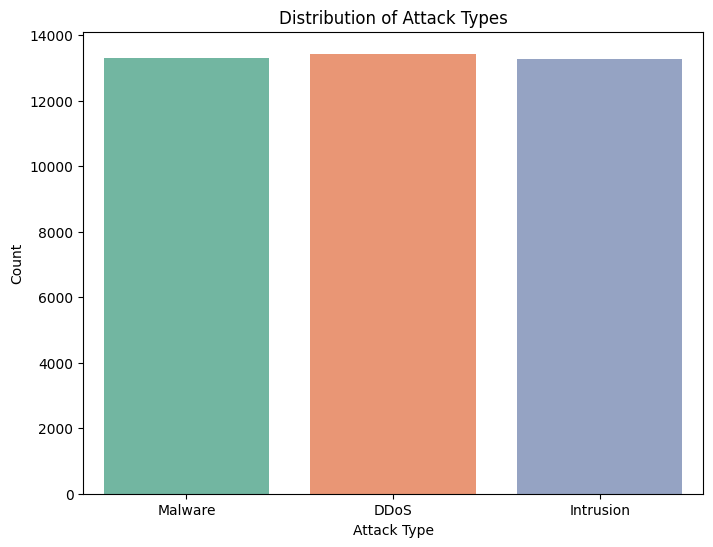

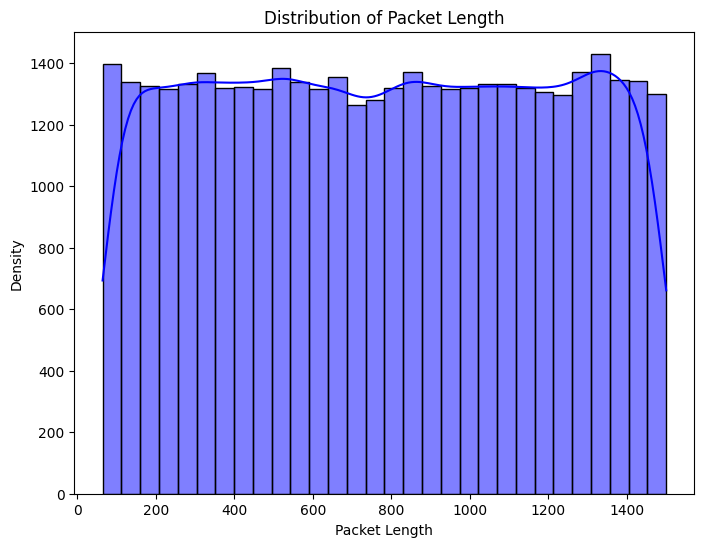

<ipython-input-8-3927867f8fd0>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attack Type', y='Packet Length', data=df_cleaned, palette='Set1')


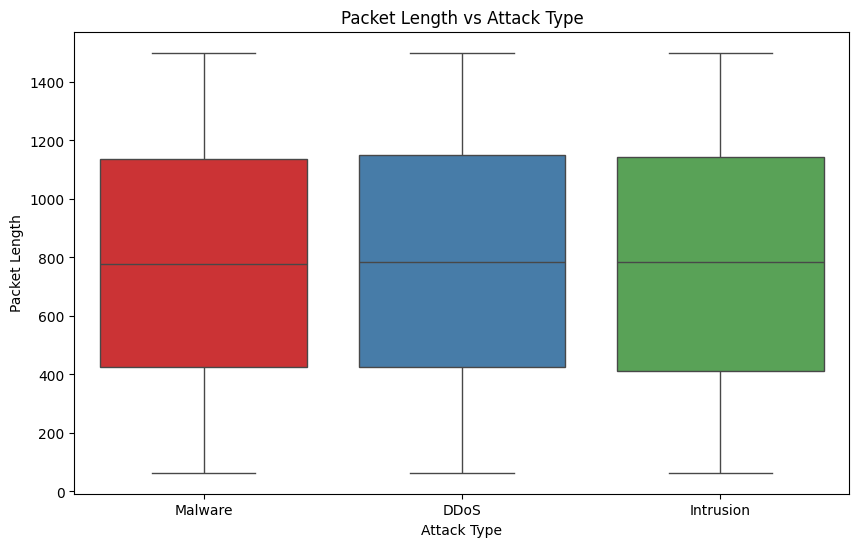

<ipython-input-8-3927867f8fd0>:42: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'], errors='coerce')



Converted 'Timestamp' to datetime format. Check for null values:
0


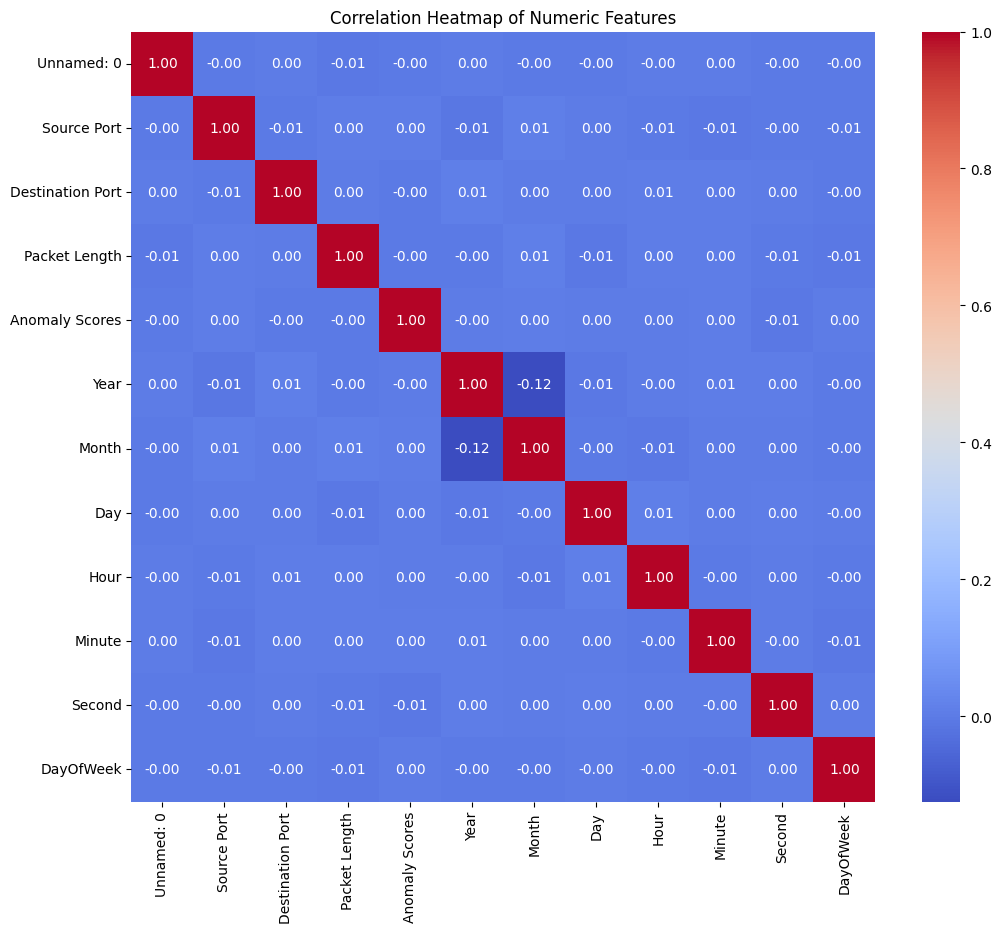

<ipython-input-8-3927867f8fd0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cleaned, palette='Set3')


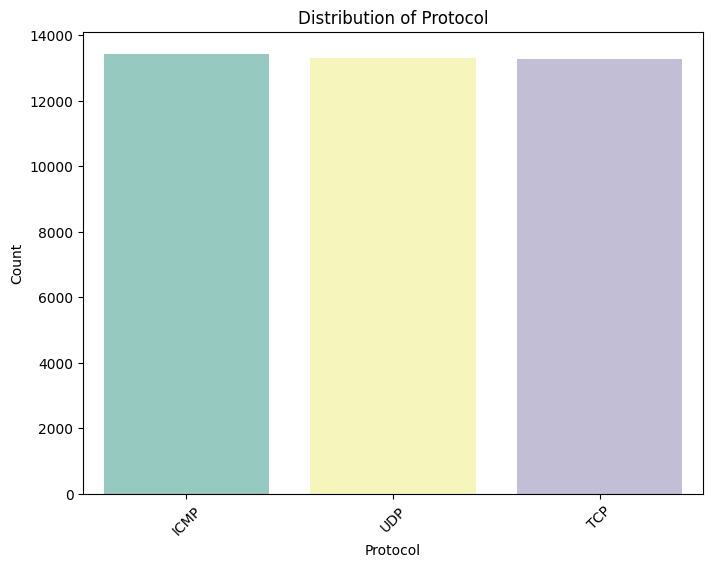

<ipython-input-8-3927867f8fd0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cleaned, palette='Set3')


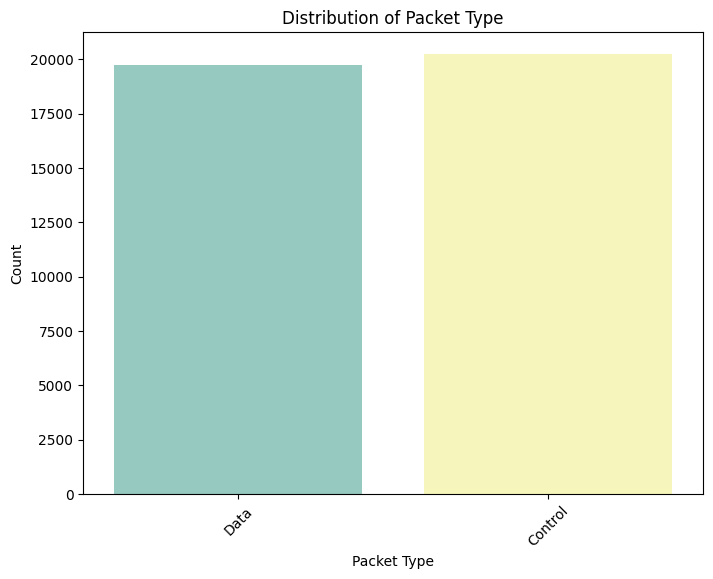

<ipython-input-8-3927867f8fd0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cleaned, palette='Set3')


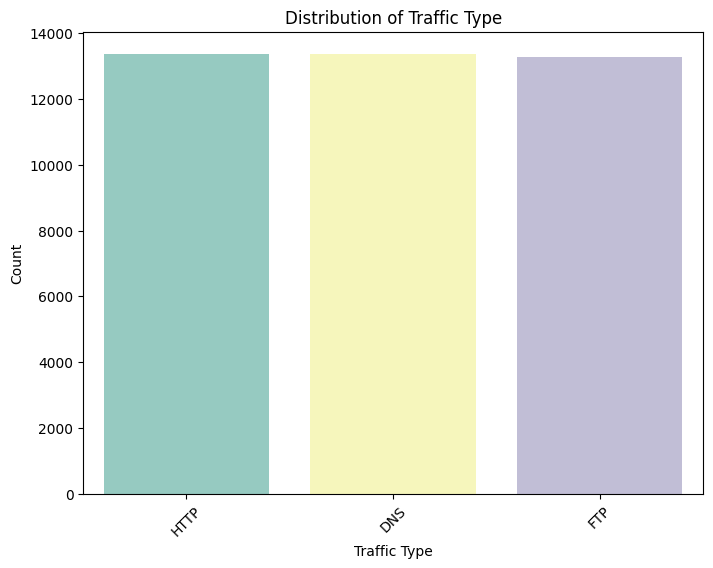

<ipython-input-8-3927867f8fd0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cleaned, palette='Set3')


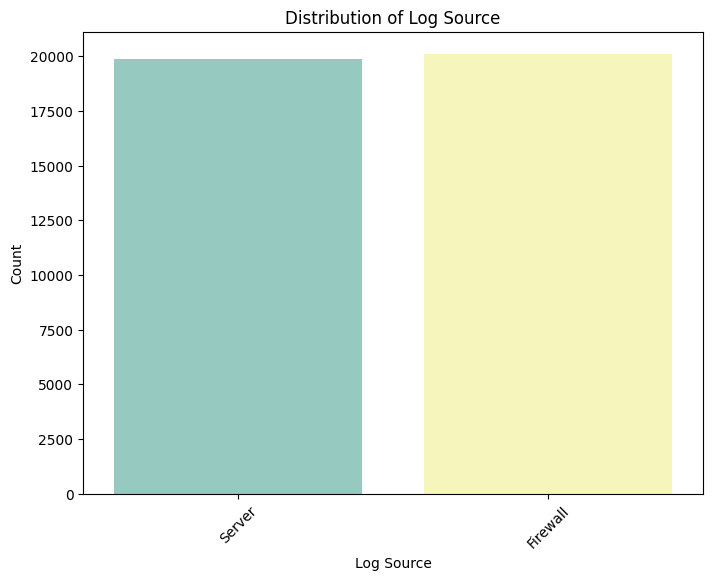

<ipython-input-8-3927867f8fd0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cleaned, palette='Set3')


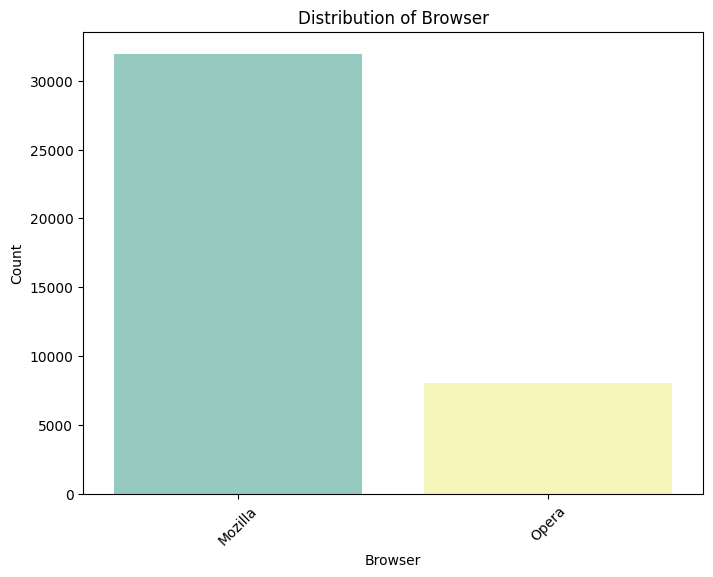

<ipython-input-8-3927867f8fd0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cleaned, palette='Set3')


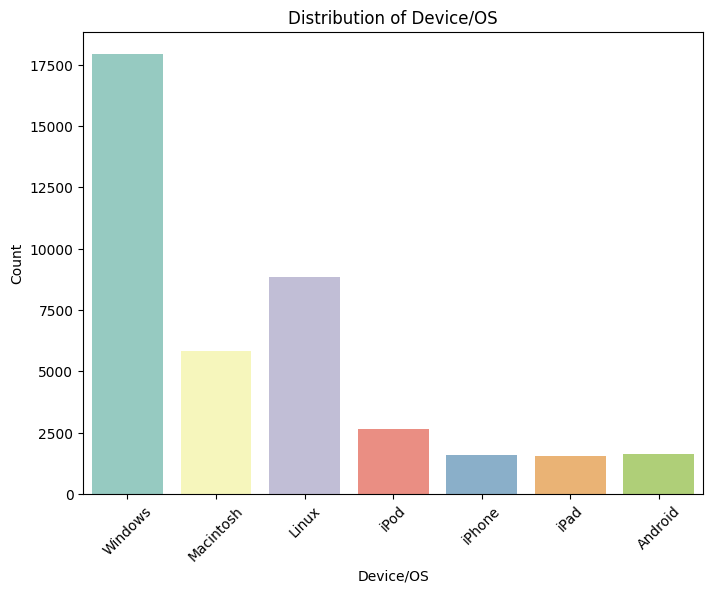

In [8]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df_cleaned = pd.read_csv('/content/drive/MyDrive/SEMESTER 1/data science/ASSIGNMENT/cyber attack prediction/updated_cybersecurity_attacks.csv')

# 1. Check the basic statistics of the dataset
print("Basic Statistics:\n", df_cleaned.describe())

# 2. Check for missing values
print("\nMissing Values:\n", df_cleaned.isnull().sum())

# 3. Distribution of Attack Types
plt.figure(figsize=(8, 6))
sns.countplot(x='Attack Type', data=df_cleaned, palette='Set2')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

# 4. Visualize the distribution of numerical features (e.g., Packet Length)
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Packet Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Packet Length')
plt.xlabel('Packet Length')
plt.ylabel('Density')
plt.show()

# 5. Visualize the relationship between numerical features and attack type (Packet Length vs. Attack Type)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attack Type', y='Packet Length', data=df_cleaned, palette='Set1')
plt.title('Packet Length vs Attack Type')
plt.show()

#if 'Timestamp' in df_cleaned.columns:
#    df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'], errors='coerce')

# Ensure Timestamp is in datetime format (if applicable)
if 'Timestamp' in df_cleaned.columns:
    df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'], errors='coerce')
    print("\nConverted 'Timestamp' to datetime format. Check for null values:")
    print(df_cleaned['Timestamp'].isnull().sum())

# Drop non-numeric columns for the correlation heatmap
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns
df_numeric = df_cleaned.drop(columns=non_numeric_cols)

# 6. Correlation Heatmap to understand relationships between numeric features
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# 7. Pairplot of the features to explore relationships (optional for smaller datasets)
# sns.pairplot(df_cleaned, hue='Attack Type', diag_kind='kde', palette='Set1')
# plt.show()

# 8. Analyze categorical features' distribution
categorical_cols = ['Protocol', 'Packet Type', 'Traffic Type', 'Log Source', 'Browser', 'Device/OS']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_cleaned, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# **model**

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define a list of classifiers to consider
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Print the classifiers available for selection
for name, clf in classifiers.items():
    print(f"Model: {name} - Classifier: {clf}")


Model: Logistic Regression - Classifier: LogisticRegression(max_iter=1000)
Model: Random Forest - Classifier: RandomForestClassifier()
Model: Support Vector Classifier - Classifier: SVC()
Model: Decision Tree - Classifier: DecisionTreeClassifier()
Model: K-Nearest Neighbors - Classifier: KNeighborsClassifier()


Checking Missing Values and Data Consistency:

In [10]:
# Check for missing values after cleaning column names
print("Missing values in each column:")
print(df.isnull().sum())

# Check for any data inconsistencies or duplicates
print("\nNumber of duplicates in the dataset:", df.duplicated().sum())

# Drop duplicates if necessary
df = df.drop_duplicates()

# Check the first few rows of the cleaned dataset
df.head()


Missing values in each column:
Unnamed: 0                0
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
s                         0
Action Taken              0
Severity Level            0
User Information          0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
Browser                   0
Device/OS                 0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
DayOfWeek                 0
dtype: int64

Num

,Unnamed: 0,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,...,Log Source,Browser,Device/OS,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,0,30-05-2023 06:33,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,...,Server,Mozilla,Windows,2023,5,30,6,33,58,1
1,1,26-08-2020 07:08,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,...,Firewall,Mozilla,Windows,2020,8,26,7,8,30,2
2,2,13-11-2022 08:23,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,...,Firewall,Mozilla,Windows,2022,11,13,8,23,25,6
3,3,02-07-2023 10:38,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,...,Firewall,Mozilla,Macintosh,2023,7,2,10,38,46,6
4,4,16-07-2023 13:11,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,...,Firewall,Mozilla,Windows,2023,7,16,13,11,7,6


Feature Engineering

In [11]:
if 'Timestamp' in df.columns:
    # Convert 'Timestamp' to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Create new time-based features
    df['Hour'] = df['Timestamp'].dt.hour
    df['Day'] = df['Timestamp'].dt.day
    df['Month'] = df['Timestamp'].dt.month
    df['Day of Week'] = df['Timestamp'].dt.dayofweek


<ipython-input-11-98e3c9684153>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


## **Code to Train and Evaluate a Random Forest Classifier for Attack Type Prediction:**

Clean the column names

In [12]:
# Clean the column names to remove any extra spaces
df.columns = df.columns.str.strip()

# Check the cleaned column names
print(df.columns)


Index(['Unnamed: 0', 'Timestamp', 'Source IP Address',
       'Destination IP Address', 'Source Port', 'Destination Port', 'Protocol',
       'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 's', 'Action Taken', 'Severity Level',
       'User Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Browser', 'Device/OS', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'DayOfWeek', 'Day of Week'],
      dtype='object')


Define the target column

In [13]:
# Define the target column (attack type) and clean feature set
target_column = 'Attack Type'

# Define features (X) and the target variable (y)
X = df.drop(columns=[target_column])  # Features: all columns except 'Attack Type'
y = df[target_column]  # Target: 'Attack Type'

# Check the target variable and features
print(X.head())
print(y.head())


   Unnamed: 0           Timestamp Source IP Address Destination IP Address  \
0           0 2023-05-30 06:33:00     103.216.15.12           84.9.164.252   
1           1 2020-08-26 07:08:00    78.199.217.198         66.191.137.154   
2           2 2022-11-13 08:23:00      63.79.210.48          198.219.82.17   
3           3 2023-07-02 10:38:00     163.42.196.10        101.228.192.255   
4           4 2023-07-16 13:11:00     71.166.185.76        189.243.174.238   

   Source Port  Destination Port Protocol  Packet Length Packet Type  \
0        31225             17616     ICMP            503        Data   
1        17245             48166     ICMP           1174        Data   
2        16811             53600      UDP            306     Control   
3        20018             32534      UDP            385        Data   
4         6131             26646      TCP           1462        Data   

  Traffic Type  ...  Browser  Device/OS  Year Month Day Hour Minute Second  \
0         HTTP  ... 

# TRAINING model

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the cleaned dataset
df_cleaned = pd.read_csv('/content/drive/MyDrive/SEMESTER 1/data science/ASSIGNMENT/cyber attack prediction/updated_cybersecurity_attacks.csv')

# Check data types
print(df_cleaned.dtypes)

# Define features and target variable
X = df_cleaned.drop(columns=['Attack Type'])  # Features
y = df_cleaned['Attack Type']  # Target variable

# Ensure all features are numeric
X = X.select_dtypes(include=['float64', 'int64'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create and train the Random Forest model with increased number of estimators
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)  # Increased number of trees
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Unnamed: 0                  int64
Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
s                          object
Action Taken               object
Severity Level             object
User Information           object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
Browser                    object
Device/OS                  object
Year                        int64
Month                       int64
Day           

# **testing the model**

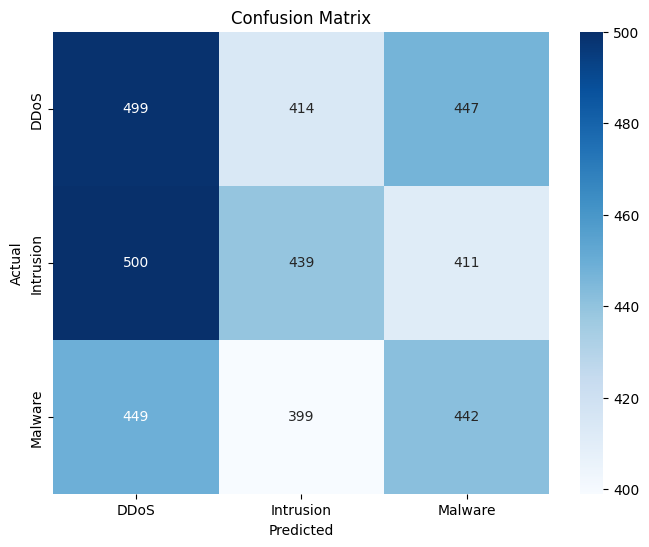


Classification Report:
              precision    recall  f1-score   support

        DDoS       0.34      0.37      0.36      1360
   Intrusion       0.35      0.33      0.34      1350
     Malware       0.34      0.34      0.34      1290

    accuracy                           0.34      4000
   macro avg       0.35      0.34      0.34      4000
weighted avg       0.35      0.34      0.34      4000



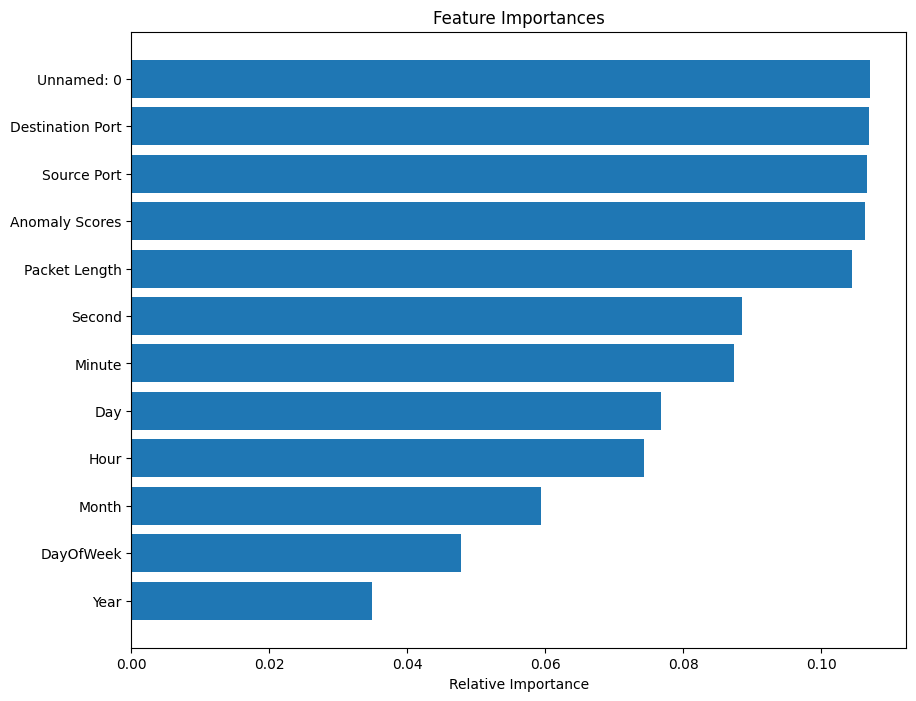

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize the top features
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()
